<a href="https://colab.research.google.com/github/prakashksarangi/Python-Project-Code/blob/main/NLP_cource_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
!pip install vaderSentiment
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
#for bert
"""
    We are using pretrained 'bert-base-multilingual-uncased-sentiment' model
    for predicting the sentiment of the review as a number of stars (between 1 and 5)
    """;
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
# Vader sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # for polarity score
analyser = SentimentIntensityAnalyzer()

"""
   following functions returns positive, negative, neutral emotion score of the text respectively.
    """;
def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

In [ ]:
import pandas as pd

df = pd.read_csv('/IndianElection19TwitterData.csv', index_col=0, nrows=100000)
df

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
...,...,...,...
99995,2019-04-09 19:08:02+00:00,AnitaHarwani2,Jawaharlal Nehru had donated our Sindh provinc...
99996,2019-04-09 19:05:24+00:00,JatinGarg187,It's very sad to hear about the incident occur...
99997,2019-04-09 19:04:57+00:00,param_rl,"someone has so much negative to yell, while so..."
99998,2019-04-09 18:59:43+00:00,onlynishank,Our fearless PM has simply refused to do an op...


In [ ]:
"""
 Filtering out tweets with some keywords and hashtags in it
 referring to Narendra Modi that are commonly used on twitter
    """;

modi = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "@narendramodi","#Vote4Modi"]
modi_df = pd.DataFrame(columns=["Date", "User","Tweet"])

def ismodi(tweet):
    t = tweet.split()
    for i in modi:
        if i in t:
            return True

# Here df is the main data
for row in df.values:
    if ismodi(str(row[2])):
         modi_df = modi_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)

modi_df

Streaming output truncated to the last 5000 lines.
<ipython-input-12-f9c213b748fd>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modi_df = modi_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)
<ipython-input-12-f9c213b748fd>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modi_df = modi_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)
<ipython-input-12-f9c213b748fd>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modi_df = modi_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)
<ipython-input-12-f9c213b748fd>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
4,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...
...,...,...,...
19425,2019-04-09 23:45:02+00:00,aseelbathery,@ndtv Of course yes. Because whatever the stri...
19426,2019-04-09 21:16:28+00:00,anubhavtandonp,@RahulGandhi @narendramodi all of a sudden the...
19427,2019-04-09 20:47:14+00:00,cLEOpatra2878,@dipankarghose31 @IndianExpress @narendramodi ...
19428,2019-04-09 19:47:58+00:00,IctcImpact,@Gurublr9 @Tejasvi_Surya @ofbjp_usa @ofbjpkarn...


In [ ]:
modi_df['Tweet'].nunique()

19430

In [ ]:
"""
 Filtering out tweets with some keywords and hashtags in it
 referring to Rahul Gandhi that are commonly used on twitter
    """;

rahul = ["rahul", "Rahul","RahulGandhi", "gandhi","@RahulGandhi","Gandhi",
         "#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi"]

rahul_df = pd.DataFrame(columns=["Date", "User","Tweet"])

def israhul(tweet):
    t = tweet.split()
    for i in rahul:
        if i in t:
            return True

for row in df.values:
    if israhul(str(row[2])):
         rahul_df = rahul_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)

rahul_df

<ipython-input-13-fd61cac7e3ab>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rahul_df = rahul_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)
<ipython-input-13-fd61cac7e3ab>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rahul_df = rahul_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)
<ipython-input-13-fd61cac7e3ab>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rahul_df = rahul_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)
<ipython-input-13-fd61cac7e3ab>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rahul_df = rahul_df.append({"Date":ro

In [ ]:
rahul_df['Tweet'].nunique()

9878

In [ ]:
from sklearn.feature_extraction import text
import string
stop = text.ENGLISH_STOP_WORDS

"""
 Removing stopwords (as in sklearn library) from tweets so as to get good polarity scores
    """;
modi_df['Tweet'] = modi_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
rahul_df['Tweet'] = rahul_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

"""
 Removing panctuations from tweets
    """;
modi_df['Tweet'] = modi_df['Tweet'].apply(remove_punctuations)
rahul_df['Tweet'] = rahul_df['Tweet'].apply(remove_punctuations)


In [ ]:
"""
 Calculating the polarity scores with help of code snippets mentioned at the importing libraries section
    """;
modi_df['pos'] = modi_df['Tweet'].apply(lambda x :pos(x))
modi_df['neg'] = modi_df['Tweet'].apply(lambda x :neg(x))
modi_df['neu'] = modi_df['Tweet'].apply(lambda x :neu(x))

In [ ]:
import pandas as pd

# Assuming 'modi_df' is your DataFrame

# Check DataFrame Length
print(len(modi_df))

# Check DataFrame Index Range
modi_df = modi_df.reset_index(drop=True)

# Initialize the 'emotion' list
emotion = []

# Calculate maximum polarity score for each tweet
for i in range(len(modi_df)):
    emotion.append(max(modi_df['pos'][i], modi_df['neu'][i], modi_df['neg'][i]))

# Assign the 'FinalEmotion' based on the highest score
modi_df['FinalEmotion'] = emotion

# Iterate over rows using iterrows
for index, row in modi_df.iterrows():
    if row['FinalEmotion'] == row['pos']:
        modi_df.at[index, 'FinalEmotion'] = 'positive'
    elif row['FinalEmotion'] == row['neg']:
        modi_df.at[index, 'FinalEmotion'] = 'negative'
    elif row['FinalEmotion'] == row['neu']:
        modi_df.at[index, 'FinalEmotion'] = 'neutral'

# Display the updated DataFrame
print(modi_df)


19430
                            Date             User  \
0      2019-05-18 23:50:47+00:00  advosushildixit   
1      2019-05-18 23:00:03+00:00           jiaeur   
2      2019-05-18 22:53:54+00:00    PVenkatGandhi   
3      2019-05-18 22:20:48+00:00      TheNirbhay1   
4      2019-05-18 21:22:29+00:00      ShakeChilli   
...                          ...              ...   
19425  2019-04-09 23:45:02+00:00     aseelbathery   
19426  2019-04-09 21:16:28+00:00   anubhavtandonp   
19427  2019-04-09 20:47:14+00:00    cLEOpatra2878   
19428  2019-04-09 19:47:58+00:00       IctcImpact   
19429  2019-04-09 18:59:43+00:00      onlynishank   

                                                   Tweet    pos    neg    neu  \
0      anjanaomkashyap I seeing future bjp spokespers...  0.307  0.000  0.693   
1      LokSabhaElections2019 23rd May 2019 reveal  Ev...  0.228  0.000  0.772   
2      LokSabhaElections2019 23rd May 2019 reveal  Ev...  0.228  0.000  0.772   
3      PM Modi creates new record

In [ ]:
modi_df['FinalEmotion'].value_counts()

neutral     18994
positive      323
negative      113
Name: FinalEmotion, dtype: int64

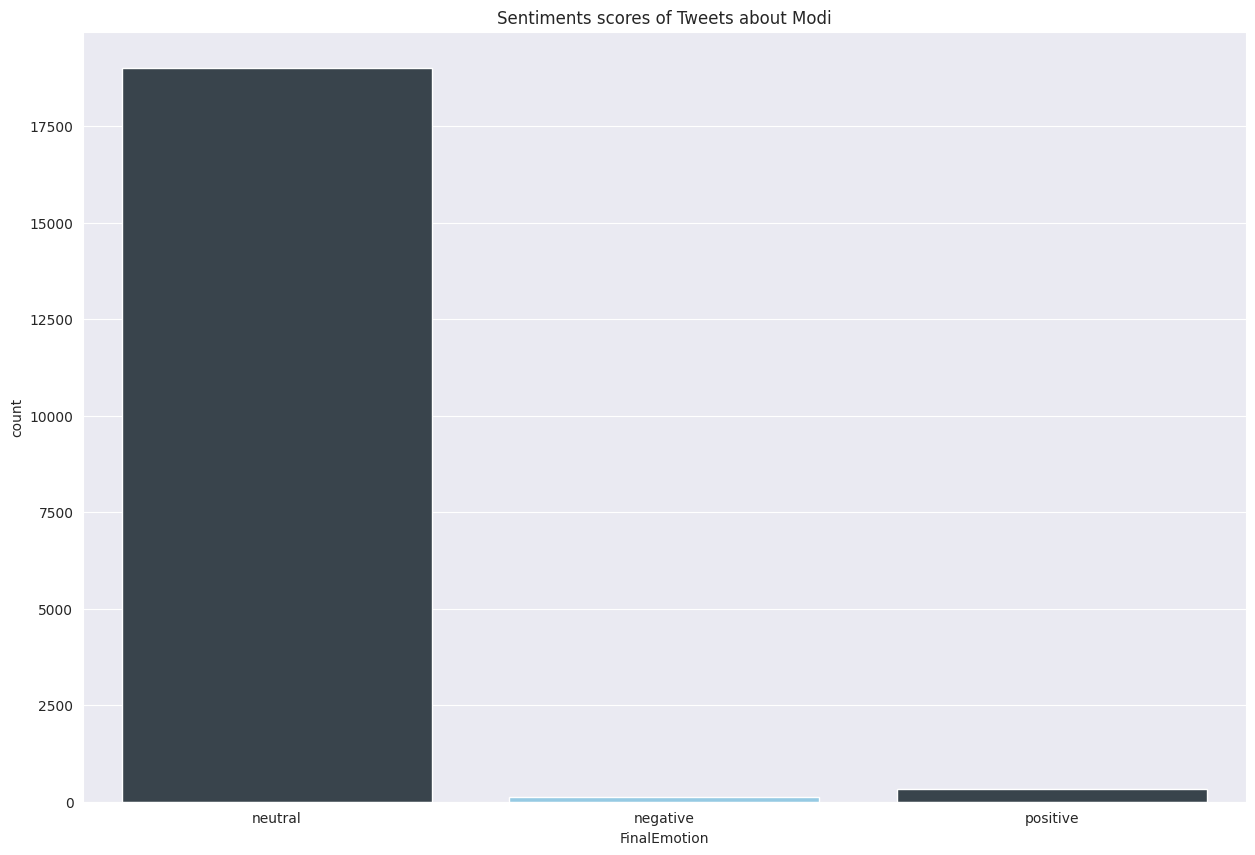

In [ ]:
# Plot visualizing the counts of emotions of all the tweets
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=modi_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')
plt.show()

In [ ]:
"""
 Calculating the polarity scores with help of code snippets mentioned at the importing libraries section
    """;
rahul_df['pos'] = rahul_df['Tweet'].apply(lambda x :pos(x))
rahul_df['neg'] = rahul_df['Tweet'].apply(lambda x :neg(x))
rahul_df['neu'] = rahul_df['Tweet'].apply(lambda x :neu(x))

In [ ]:
rahul_df

,Date,User,Tweet,pos,neg,neu
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...,0.093,0.138,0.769
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2019 ScottMorris...,0.152,0.000,0.848
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...,0.000,0.000,1.000
3,2019-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...,0.318,0.000,0.682
4,2019-05-18 18:31:10+00:00,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...,0.083,0.088,0.828
...,...,...,...,...,...,...
9873,2019-04-10 01:45:36+00:00,adityaC1906,Most disgusting appeal prime minister playing ...,0.133,0.248,0.619
9874,2019-04-10 01:44:18+00:00,asarpotar,So RahulGandhi wins IF Does mean cases scams l...,0.132,0.239,0.630
9875,2019-04-10 01:16:22+00:00,prism_anand,RahulGandhi file nomination Amethi today Sonia...,0.000,0.000,1.000
9876,2019-04-09 23:45:02+00:00,aseelbathery,ndtv Of course yes Because strikes conducted f...,0.089,0.083,0.828


In [ ]:
import pandas as pd

# Assuming 'rahul_df' is your DataFrame

# Check DataFrame Length
print(len(rahul_df))

# Check DataFrame Index Range
rahul_df = rahul_df.reset_index(drop=True)

# Initialize the 'emotion' list
emotion = []

# Calculate maximum polarity score for each tweet
for i in range(len(rahul_df)):
    emotion.append(max(rahul_df['pos'][i], rahul_df['neu'][i], rahul_df['neg'][i]))

# Assign the 'FinalEmotion' based on the highest score
rahul_df['FinalEmotion'] = emotion

# Iterate over rows using iterrows
for index, row in rahul_df.iterrows():
    if row['FinalEmotion'] == row['pos']:
        rahul_df.at[index, 'FinalEmotion'] = 'positive'
    elif row['FinalEmotion'] == row['neg']:
        rahul_df.at[index, 'FinalEmotion'] = 'negative'
    elif row['FinalEmotion'] == row['neu']:
        rahul_df.at[index, 'FinalEmotion'] = 'neutral'

# Display the updated DataFrame
print(rahul_df)


9878
                           Date             User  \
0     2019-05-18 19:49:52+00:00     Sunnysweet16   
1     2019-05-18 18:56:52+00:00    drnitinchaube   
2     2019-05-18 18:54:01+00:00        mrvivek07   
3     2019-05-18 18:52:03+00:00    JosephPravinP   
4     2019-05-18 18:31:10+00:00  VandanaMegastar   
...                         ...              ...   
9873  2019-04-10 01:45:36+00:00      adityaC1906   
9874  2019-04-10 01:44:18+00:00        asarpotar   
9875  2019-04-10 01:16:22+00:00      prism_anand   
9876  2019-04-09 23:45:02+00:00     aseelbathery   
9877  2019-04-09 21:16:28+00:00   anubhavtandonp   

                                                  Tweet    pos    neg    neu  \
0     Wonder academic journalist asks INC India Rahu...  0.093  0.138  0.769   
1     Congrats change australiavotes2019 ScottMorris...  0.152  0.000  0.848   
2     Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...  0.000  0.000  1.000   
3     ajaymaken RahulGandhi And final touch Modi j

In [ ]:
rahul_df['FinalEmotion'].value_counts()

neutral     9691
positive     117
negative      70
Name: FinalEmotion, dtype: int64

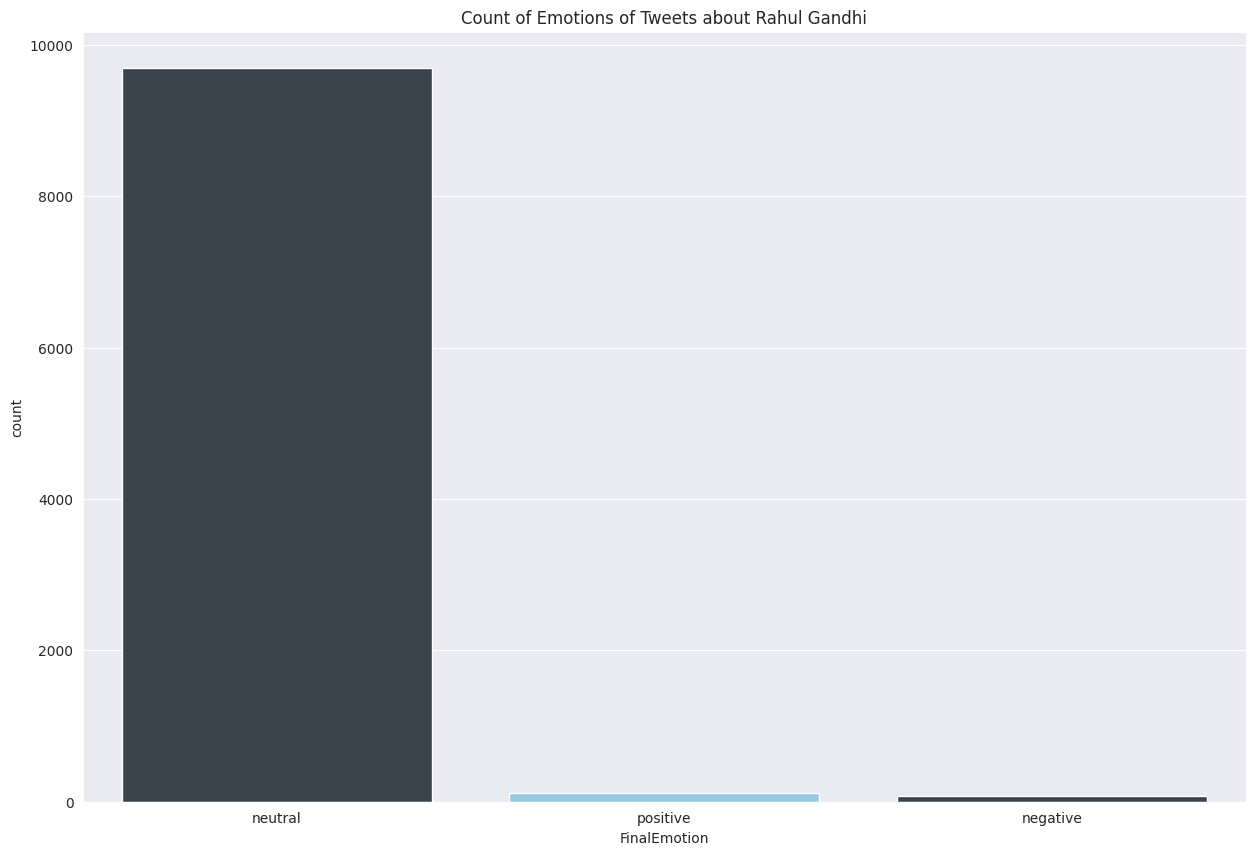

In [ ]:
# Plot visualizing the counts of emotions of all the tweets
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=rahul_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Count of Emotions of Tweets about Rahul Gandhi')
plt.show()

In [ ]:
!pip install flair
!pip install urllib3==1.25.1
import urllib3
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 29

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 kB 3.0 MB/s eta 0:00:00
Reason for being yanked: Broken release
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.34.14 requires urllib3<2.1,>=1.25.4; python_version >= "3.10", but you have urllib3 1.25.1 which is incompatible.


2024-01-07 14:27:54,886 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpunrpztyu


100%|██████████| 253M/253M [00:15<00:00, 16.7MB/s]

2024-01-07 14:28:11,394 copying /tmp/tmpunrpztyu to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-01-07 14:28:12,933 removing temp file /tmp/tmpunrpztyu


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
"""
 Flair text classifier model code snippet to get the emotion of tweet
    """;
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"

In [ ]:
#Just to clear the previous sentiments by vaderSentiment, we need to drop that columns for using Flair on it
rahul_df.drop(['pos', 'neg', 'neu', 'FinalEmotion'],axis=1,inplace=True)
modi_df.drop(['pos', 'neg', 'neu', 'FinalEmotion'],axis=1,inplace=True)


In [ ]:
rahul_df

,Date,User,Tweet
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2019 ScottMorris...
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...
3,2019-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...
4,2019-05-18 18:31:10+00:00,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...
...,...,...,...
9873,2019-04-10 01:45:36+00:00,adityaC1906,Most disgusting appeal prime minister playing ...
9874,2019-04-10 01:44:18+00:00,asarpotar,So RahulGandhi wins IF Does mean cases scams l...
9875,2019-04-10 01:16:22+00:00,prism_anand,RahulGandhi file nomination Amethi today Sonia...
9876,2019-04-09 23:45:02+00:00,aseelbathery,ndtv Of course yes Because strikes conducted f...


In [ ]:
# Applying flair on both the dataframes
rahul_df['Emotion']=rahul_df['Tweet'].apply(flair_prediction)
modi_df['Emotion']=modi_df['Tweet'].apply(flair_prediction)

Text(0.5, 1.0, 'Sentiments scores of Tweets about Modi')

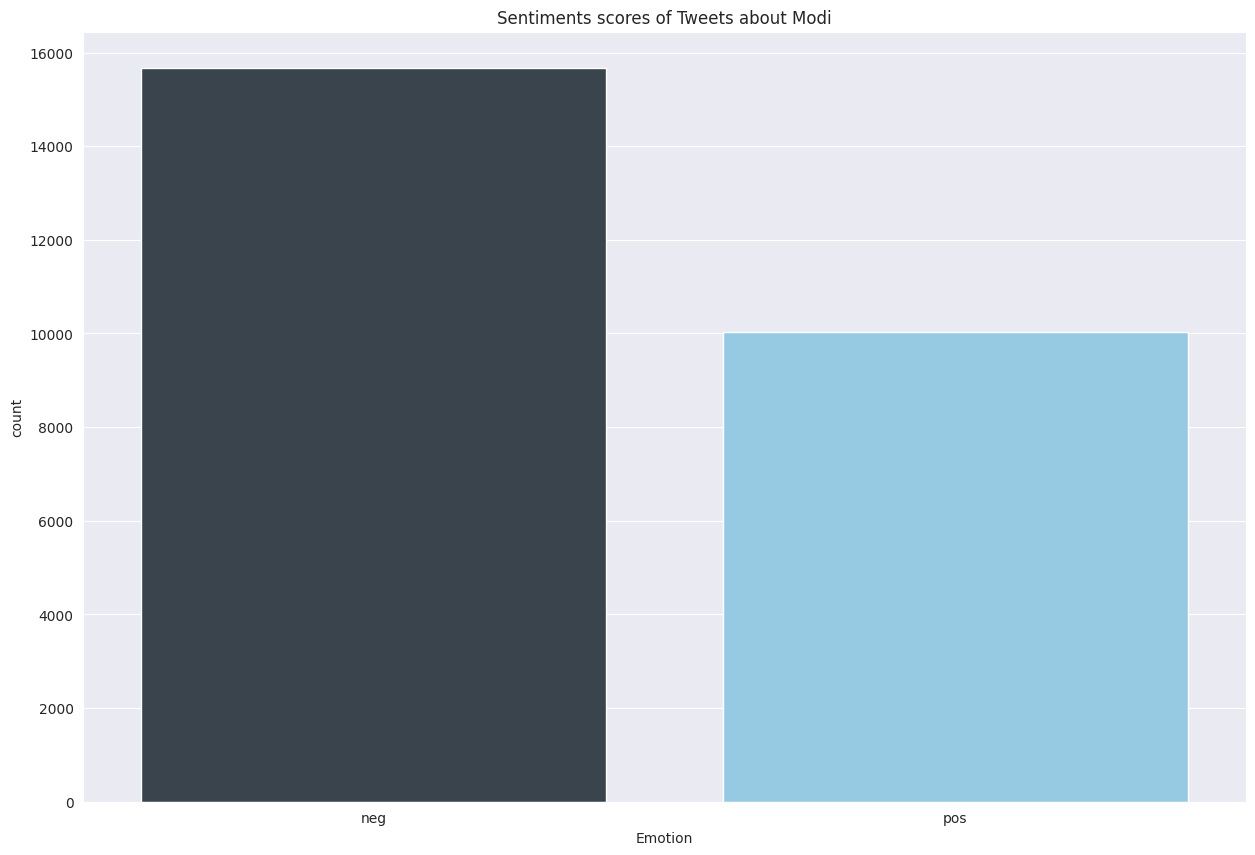

In [ ]:
# Sentiments for Narendra Modi
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=modi_df['Emotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')

Text(0.5, 1.0, 'Sentiments scores of Tweets about Rahul Gandhi')

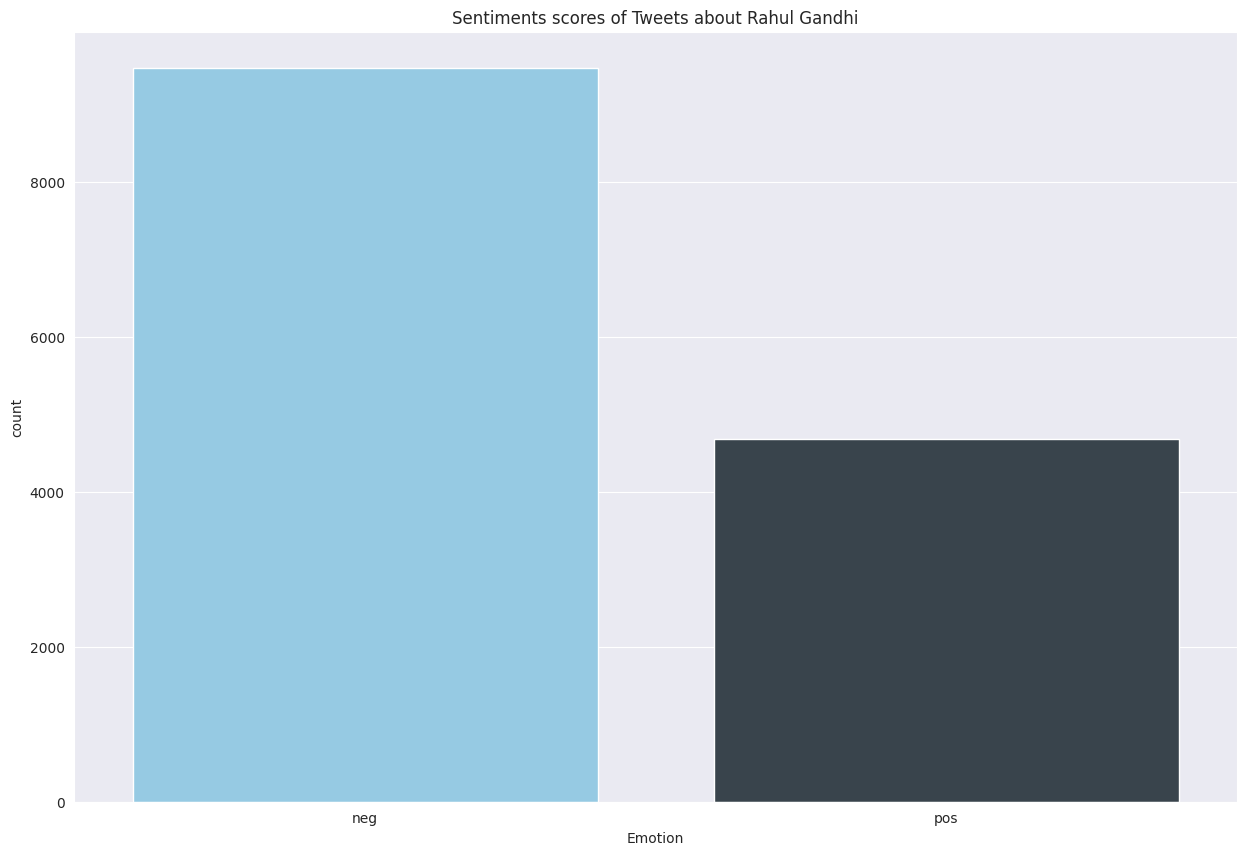

In [ ]:
# Sentiments for Rahul Gandhi
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=rahul_df['Emotion'],palette=['#89CFF0','#36454F'])
ax.set_title('Sentiments scores of Tweets about Rahul Gandhi')

In [ ]:
df

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
...,...,...,...
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...
142562,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...
142563,2019-01-24 12:57:48+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...
142564,2019-01-24 12:48:37+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...


In [ ]:
# Keywords mentioning Modi and Rahul respectively
NaMo_ref = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "@narendramodi","#Vote4Modi"]
RaGa_ref = ["rahul", "Rahul","RahulGandhi", "gandhi","@RahulGandhi","Gandhi","#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi"]

In [ ]:
# method to refer whether contains perticular words in tweets
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

"""
 finding whether the tweet referred about Modi or Rahul
    """;
df['NaModi'] = df['Tweet'].apply(lambda x: identify_subject(x, NaMo_ref))
df['RaGandhi'] = df['Tweet'].apply(lambda x: identify_subject(x, RaGa_ref))
df.head(10)

,Date,User,Tweet,NaModi,RaGandhi
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
5,2019-05-18 22:16:26+00:00,ankitgarg20,My somewhat biased exit poll for India electio...,1,0
6,2019-05-18 21:51:56+00:00,pkm1999,@rupasubramanya Even assuming statistical erro...,0,0
7,2019-05-18 21:43:15+00:00,rohanmodi,@abhijitmajumder Small correction. Nobody gets...,1,0
8,2019-05-18 21:36:20+00:00,Jmend124,We still fucking dancing 🕺🏼 ♏️ #INC,0,0
9,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,1,0


In [ ]:
"""
 Filtering tweets mentioning either one of the pm candidate or both
 assigning 1 for NaModi and RaGandhi variables where there is a mention of them in the tweets
 which was already decide by looking the keywords in tweets
    """;
df=df[(df['NaModi']==1) | (df['RaGandhi']==1)]
df

,Date,User,Tweet,NaModi,RaGandhi
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
...,...,...,...,...,...
142555,2019-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0
142556,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1
142560,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1


In [ ]:
df=df.reset_index()
df.drop('index',axis=1,inplace=True)
df

,Date,User,Tweet,NaModi,RaGandhi
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
...,...,...,...,...,...
78054,2019-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0
78055,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1
78056,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1
78057,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1


In [ ]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob
import nltk

# Downloading imp libraries and packages
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
!python -m textblob.download_corpora
"""
 Processing tweets by removing stopwords from nltk library
    """;
def preprocess_tweets(tweet):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x))
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


,Date,User,Tweet,NaModi,RaGandhi,Processed Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0,@anjanaomkashyap I seeing future #bjp spokespe...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,#LokSabhaElections2019 23rd May 2019 reveal .....
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,#LokSabhaElections2019 23rd May 2019 reveal .....
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0,PM Modi creates new record PM democratic count...


In [ ]:
print('Base Tweet\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned Tweet\n', df['Processed Tweet'][0])

Base Tweet
 @anjanaomkashyap I am seeing you as future #bjp spokesperson..
Good luck. Anjana Om Modi oops Kashyap.
Journalists like you changed the meaning of journalism. Janta maaf nai karege

------------------------------------

Cleaned Tweet
 @anjanaomkashyap I seeing future #bjp spokesperson.. Good luck. Anjana Om Modi oops Kashyap. Journalists like changed meaning journalism. Janta maaf nai karege


In [ ]:
# Calculate polarity and subjectivity of the tweet
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'NaModi', 'RaGandhi', 'polarity', 'subjectivity']].head()

,Processed Tweet,NaModi,RaGandhi,polarity,subjectivity
0,@anjanaomkashyap I seeing future #bjp spokespe...,1,0,0.350000,0.362500
1,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,-0.050000,0.083333
2,#LokSabhaElections2019 23rd May 2019 reveal .....,1,0,0.800000,0.400000
3,#LokSabhaElections2019 23rd May 2019 reveal .....,1,0,0.800000,0.400000
4,PM Modi creates new record PM democratic count...,1,0,0.468182,0.677273


In [ ]:
display(df[df['RaGandhi']==1][['RaGandhi','polarity','subjectivity']].groupby('RaGandhi').agg([np.mean, np.max, np.min, np.median]))
df[df['NaModi']==1][['NaModi','polarity','subjectivity']].groupby('NaModi').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                 
              mean amax amin median         mean amax amin median
RaGandhi                                                         
1         0.068478  1.0 -1.0    0.0     0.346086  1.0  0.0   0.35

polarity                  subjectivity                    
            mean amax amin median         mean amax amin    median
NaModi                                                            
1       0.100709  1.0 -1.0    0.0     0.359328  1.0  0.0  0.366667

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


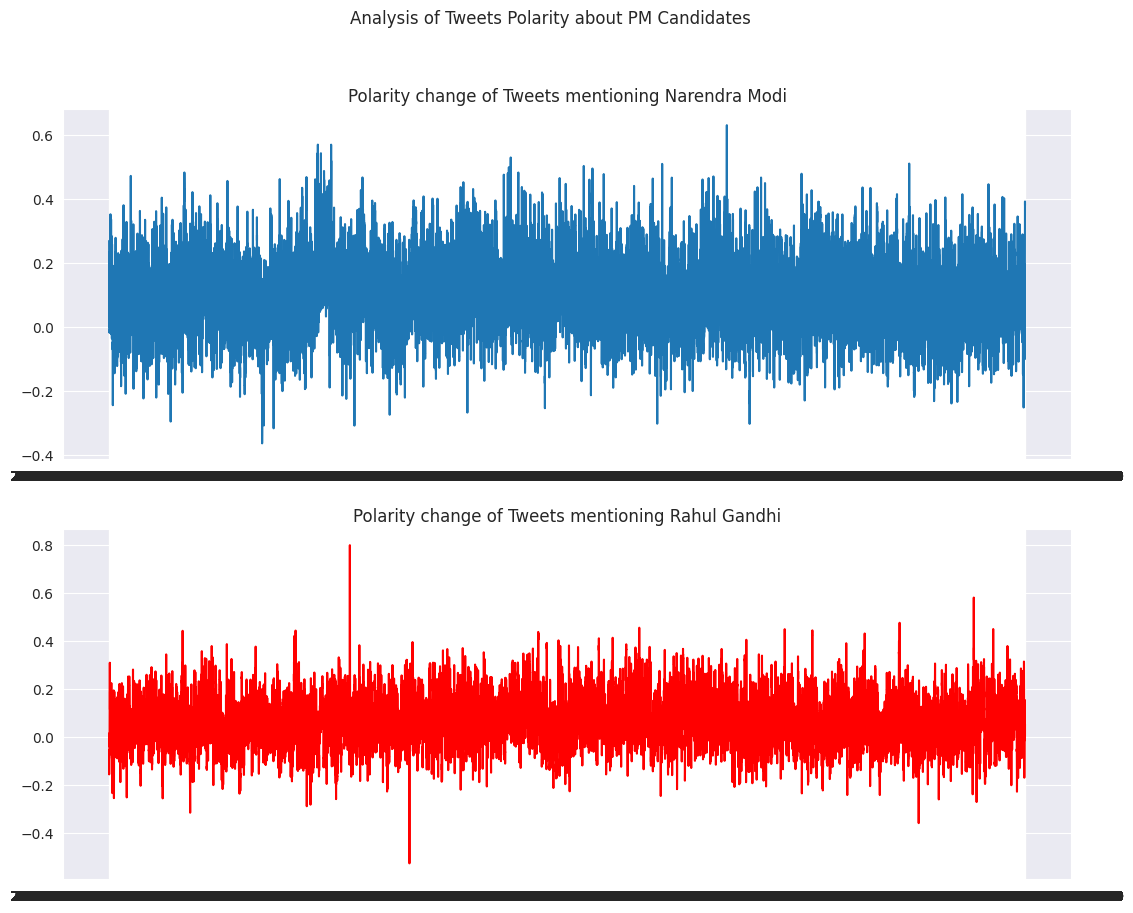

In [ ]:
naModi = df[df['NaModi']==1][['Date', 'polarity']]
naModi = naModi.sort_values(by='Date', ascending=True)
naModi['MA Polarity'] = naModi.polarity.rolling(10, min_periods=3).mean()

raGandhi = df[df['RaGandhi']==1][['Date', 'polarity']]
raGandhi = raGandhi.sort_values(by='Date', ascending=True)
raGandhi['MA Polarity'] = raGandhi.polarity.rolling(10, min_periods=3).mean()
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(naModi['Date'], naModi['MA Polarity'])
axes[0].set_title("\n".join(["Polarity change of Tweets mentioning Narendra Modi"]))
axes[1].plot(raGandhi['Date'], raGandhi['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Polarity change of Tweets mentioning Rahul Gandhi"]))

fig.suptitle("\n".join(["Analysis of Tweets Polarity about PM Candidates"]), y=0.98)

plt.show()

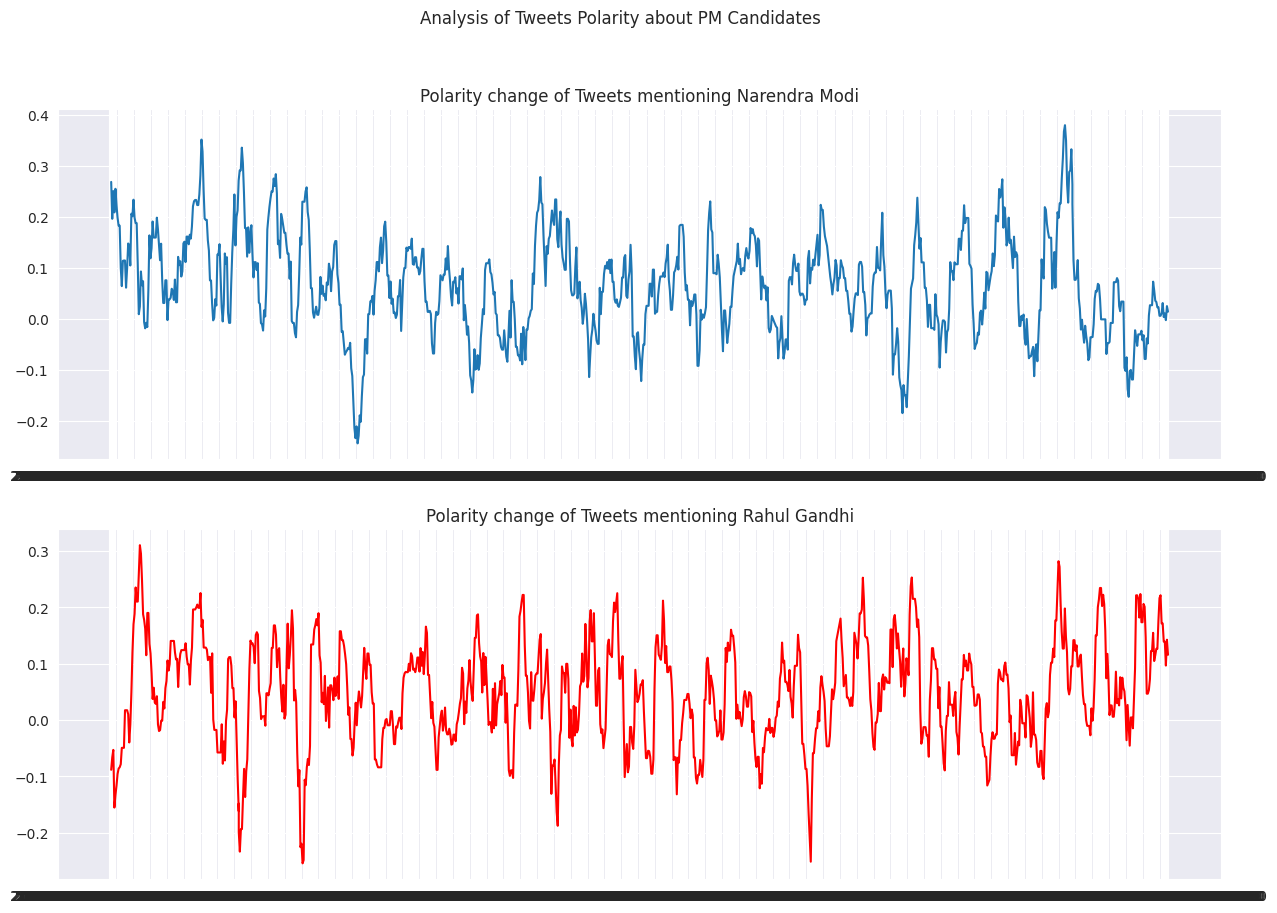

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(naModi['Date'][:1000], naModi['MA Polarity'][:1000])
axes[0].set_title("\n".join(["Polarity change of Tweets mentioning Narendra Modi"]))
axes[1].plot(raGandhi['Date'][:1000], raGandhi['MA Polarity'][:1000], color='red')
axes[1].set_title("\n".join(["Polarity change of Tweets mentioning Rahul Gandhi"]))
fig.suptitle("\n".join(["Analysis of Tweets Polarity about PM Candidates"]), y=0.98)
plt.show()